In [264]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pypianoroll
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [184]:
from music_generator.midi import play_pianoroll, sample_multitrack
from music_generator.data import get_npz_data

In [185]:
mtrack = get_npz_data(1, '../raw_data/lpd_5/lpd_5_cleansed')[0]
piano = mtrack.tracks[1]

In [186]:
X, y = sample_multitrack(mtrack, piano, 4, 4)

In [213]:
X.shape

(65, 96, 128)

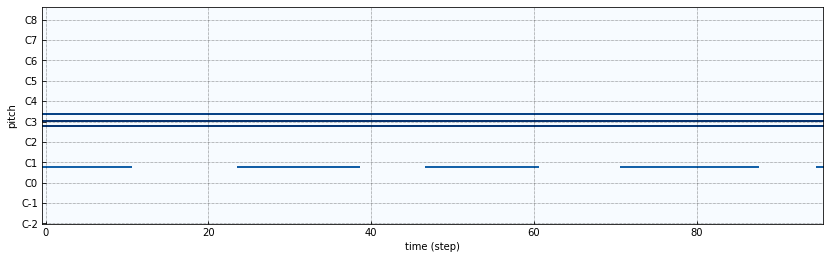

In [187]:
fig, ax = plt.subplots(figsize=(14,4))
pypianoroll.plot_pianoroll(ax=ax, pianoroll=X[1]);

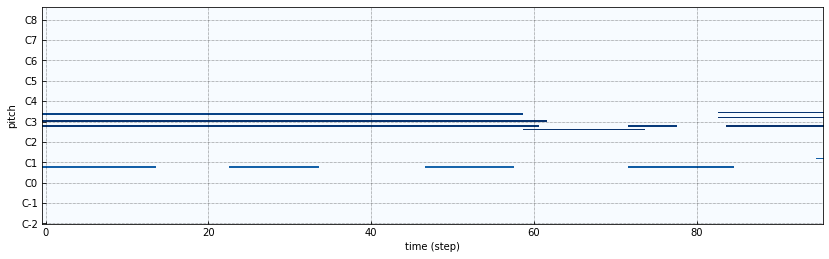

In [251]:
fig, ax = plt.subplots(figsize=(14,4))
pypianoroll.plot_pianoroll(ax=ax, pianoroll=y[1]);

In [227]:
X.shape

(65, 96, 128)

In [280]:
df = pd.DataFrame(y[0])
print(df.nunique(axis=0).to_dict())

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 4, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1}


In [ ]:
[sample, time, note] => input shape?

In [239]:
def init_model(X, y):
    input_shape = X[0].shape
    output_shape = y[0].shape[1]
    print (input_shape, output_shape)
    model = models.Sequential()
    model.add(layers.SimpleRNN(128, return_sequences=True, activation='softmax', input_shape=input_shape))
    model.add(layers.SimpleRNN(128, return_sequences=True, activation='softmax'))
    model.add(layers.Dense(128, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0003))
    return model

model = init_model(X, y)
model.summary()

(96, 128) 128
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 96, 128)           32896     
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 96, 128)           32896     
                                                                 
 dense_8 (Dense)             (None, 96, 128)           16512     
                                                                 
Total params: 82,304
Trainable params: 82,304
Non-trainable params: 0
_________________________________________________________________


In [240]:
history = model.fit(X, y, validation_split=0.2, epochs=30, batch_size=16)

Epoch 1/30
4/4 [==============================] - 1s 103ms/step - loss: 1641.3905 - val_loss: 1780.7540
Epoch 2/30
4/4 [==============================] - 0s 34ms/step - loss: 1638.7351 - val_loss: 1778.5969
Epoch 3/30
4/4 [==============================] - 0s 33ms/step - loss: 1636.8334 - val_loss: 1776.7540
Epoch 4/30
4/4 [==============================] - 0s 34ms/step - loss: 1635.1658 - val_loss: 1775.0625
Epoch 5/30
4/4 [==============================] - 0s 34ms/step - loss: 1633.6105 - val_loss: 1773.4427
Epoch 6/30
4/4 [==============================] - 0s 32ms/step - loss: 1632.1296 - val_loss: 1771.8625
Epoch 7/30
4/4 [==============================] - 0s 36ms/step - loss: 1630.6875 - val_loss: 1770.3312
Epoch 8/30
4/4 [==============================] - 0s 34ms/step - loss: 1629.2870 - val_loss: 1768.8347
Epoch 9/30
4/4 [==============================] - 0s 32ms/step - loss: 1627.8950 - val_loss: 1767.3212
Epoch 10/30
4/4 [==============================] - 0s 35ms/step - loss: 

In [241]:
X[0].reshape(1, 96, 128).shape

(1, 96, 128)

In [242]:
pred = model.predict(X[0].reshape(1, 96, 128))

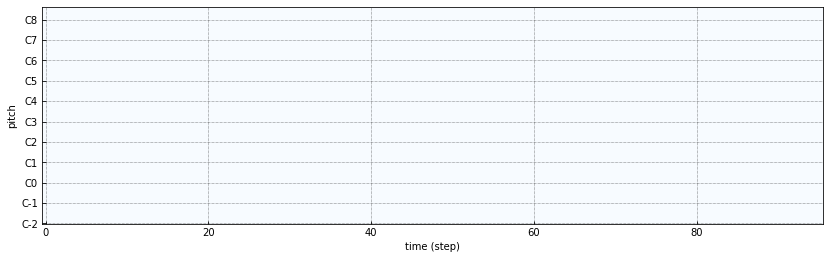

In [245]:
fig, ax = plt.subplots(figsize=(14,4))
pypianoroll.plot_pianoroll(ax=ax, pianoroll=pred[0]);